In [1]:
# 1. Import Libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 2. Load Dataset
df = pd.read_csv(r"D:\JOB\1 Pricing analyst\1 Price elasticity & demand forecasting\4 Clustering\customer_segmentation_dataset.csv")

In [3]:
df

,customer_income,purchase_frequency,avg_cart_value,discount_sensitivity,loyalty_score
0,68690.215450,32,281.056586,0.708374,4.143742
1,143592.859833,36,471.384509,0.545001,4.877333
2,115159.212435,37,461.362097,0.855989,4.078106
3,97825.602946,48,443.214857,0.334506,3.072846
4,40282.423258,14,58.017424,0.296441,4.310040
...,...,...,...,...,...
9995,131495.278471,4,144.774151,0.380068,1.172291
9996,136676.148564,7,300.109071,0.542394,1.046238
9997,143072.028954,12,22.578180,0.315423,2.908382
9998,71673.439015,13,130.650569,0.368017,4.447998


In [4]:
# 3. Preprocessing
features = df.copy()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

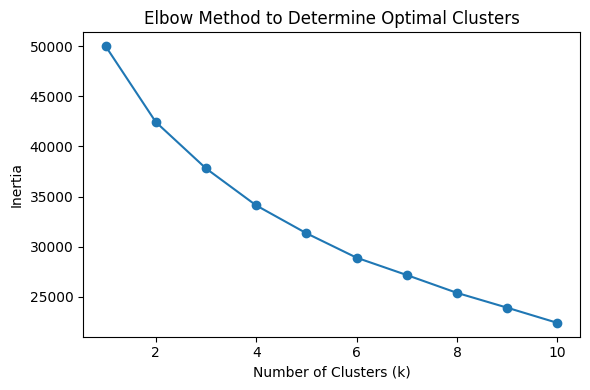

In [5]:
# 4. Elbow Method to find optimal number of clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.tight_layout()
plt.show()

In [6]:
# 5. Apply KMeans with optimal k
k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(scaled_features)

In [7]:
# 6. Cluster Profiling
cluster_profile = df.groupby("Cluster").mean()
print("\n📊 Cluster Profile:\n", cluster_profile)


📊 Cluster Profile:
          customer_income  purchase_frequency  avg_cart_value  \
Cluster                                                        
0           49349.959909           24.043852      373.808288   
1           85130.802691           24.625743      135.690862   
2           80719.929947           25.410501      143.712047   
3          120630.044478           25.280841      368.923344   

         discount_sensitivity  loyalty_score  
Cluster                                       
0                    0.531813       2.903840  
1                    0.765667       2.958519  
2                    0.216997       3.053658  
3                    0.485931       3.111386  


In [8]:
# 7. Evaluation Metrics
sil_score = silhouette_score(scaled_features, df["Cluster"])
db_index = davies_bouldin_score(scaled_features, df["Cluster"])
print(f"\n✅ Silhouette Score: {sil_score:.2f}")
print(f"✅ Davies-Bouldin Index: {db_index:.2f}")


✅ Silhouette Score: 0.14
✅ Davies-Bouldin Index: 1.87


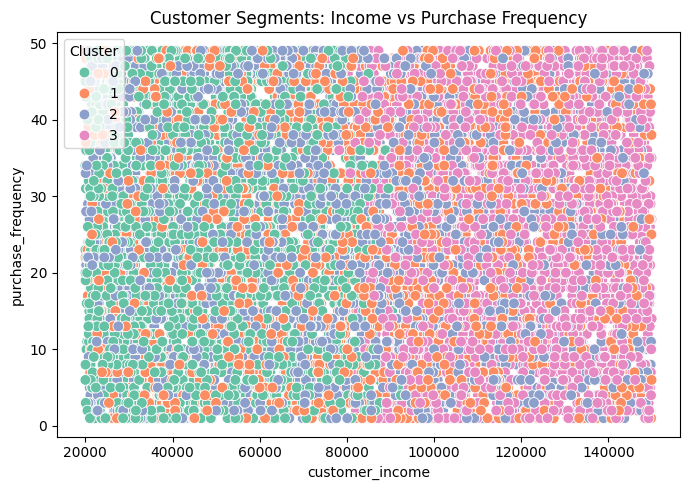

In [9]:
# 8. Visualization: Income vs Frequency
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='customer_income', y='purchase_frequency', hue='Cluster', palette='Set2', s=60)
plt.title("Customer Segments: Income vs Purchase Frequency")
plt.tight_layout()
plt.show()